In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla
import scipy.optimize as spo

# Resolvendo equações

Sistemas lineares de equações surgem naturalmente em muitos contextos na engenharia e
ciência. O NumPy, especialmente através do seu submódulo `numpy.linalg`, oferece vários
métodos para calcular soluções exatas ou aproximadas para tais sistemas, e para resolver
problemas relacionados, como encontrar os autovalores e autovetores de uma matriz ou
determinar suas várias decomposições. Neste notebook, também aprenderemos como
usar outra biblioteca fundamental no ecossistema Python chamada __SciPy__ que
pode nos ajudar a resolver equações não lineares e problemas de otimização.

## $ \S 1 $ Sistemas lineares quadrados

### $ 1.1 $ Terminologia básica

Considere um conjunto de $ n $ equações lineares em $ n $ incógnitas $ x_1, \dots, x_n $:
\begin{equation*}
\begin{cases}
& a_{11} x_1 &+& a_{12}x_2 &+& \cdots &+& a_{1n}x_n &=& b_1 \\
& a_{21} x_1 &+& a_{22}x_2 &+& \cdots &+& a_{2n}x_n &=& b_2 \\
& \vdots &+& \vdots &+& \cdots &+& \vdots &=&\vdots \\
& a_{n1} x_1 &+& a_{n2}x_2 &+& \cdots &+& a_{nn}x_n &=& b_n
\end{cases}
\end{equation*}

Tais equações são chamadas de __lineares__ porque as expressões no lado esquerdo
são lineares nas variáveis, ou seja, não envolvem potências como
$ x_1^3 $ nem produtos das variáveis como $ x_1x_2 $ nem funções mais complicadas
como $ \sin(x_1) $ ou $ e^{x_2} $.

Equivalentemente, usando notação matricial, este sistema de equações pode ser reescrito como:
\begin{equation*}
A\,\mathbf x =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} =
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{bmatrix} = \mathbf b
\end{equation*}
ou mais concisamente
$$
\boxed{\ A\,\mathbf{x} = \mathbf{b}\ }
$$

A matriz $ A $ é chamada de __matriz de coeficientes__. Observe que em nosso
caso, ela é _quadrada_ (ou seja, o número de linhas é o mesmo que o
número de colunas). Sistemas de $ m $ equações lineares em $ n $ incógnitas onde
$ m \ne n $ serão considerados apenas na próxima seção, por simplicidade.

📝 Dependendo das propriedades de $ A $ e $ \mathbf{b} $, um sistema linear
$ A\,\mathbf{x} = \mathbf{b} $ pode ter exatamente uma solução, nenhuma solução, ou
infinitas soluções.

__Exercício:__ Escreva como arrays NumPy as matrizes de coeficientes $ A $ e os
vetores $ \mathbf x $ e $ \mathbf b $ para os sistemas de equações lineares
abaixo:

(a) $$ \left\{
\begin{align*}
2x &+ 3y &\ =& \ 5 \\
4x &- \ y &\ =& \ 1
\end{align*} \right.$$

(b)
$$
\left\{\begin{align*}
x &\ \ +\ &2y & \ \ - & z & \ = & \ 4 \\
2x &\ \ - &y & \ \ + &3z & \ = & -6 \\
-3x &\ \ + &4y &\ \ + & z & \ = & 10
\end{align*} \right.
$$

O __posto__ de uma matriz é o número máximo de linhas linearmente independentes ou,
equivalentemente, colunas na matriz. Podemos calcular o posto de uma matriz em
NumPy com `linalg.matrix_rank`. Por exemplo, as duas primeiras colunas da matriz
abaixo são claramente linearmente independentes, mas a terceira coluna é apenas a soma das
duas primeiras, portanto o posto da matriz é $ 2 $:
$$
    A = \begin{bmatrix}
    1 & -1 & \phantom{-}0 \\
    2 & -3 & -1 \\
    0 & \phantom{-}1 & \phantom{-}1
    \end{bmatrix}
$$

In [ ]:
A = np.array([[1, -1,  0],
              [2, -3, -1],
              [0,  1,  1]])

# Verificar o posto:
rank = np.linalg.matrix_rank(A)
print(f"Posto de A: {rank}")

### $ 1.2 $ Resolvendo sistemas lineares quadrados de equações

__Exemplo:__ Considere o sistema de equações:
$$
\left\{\begin{alignat*}{4}
3x\  &+\ 2y\ &&-\ &z\ &=&\ 1\\
2x\ &-\ 2y\ &&+\ 4&z\ &=&\ -2\\
-x\  &+\ \tfrac{1}{2}y\ &&- &z\ &=&\ 0
\end{alignat*}\right.
$$
ou, na forma matricial,
$$
\begin{align*}
\begin{bmatrix}
3 & 2 & -1 \\
2 & -2 & 4 \\
-1 & 0.5 & -1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
\phantom{-}1 \\
-2 \\
\phantom{-}0
\end{bmatrix}
\end{align*}
$$

Podemos pedir ao NumPy para resolvê-lo usando a função `linalg.solve`:

In [ ]:
# Matriz de coeficientes A e vetor constante b:
A = np.array([[3, 2, -1],
              [2, -2, 4],
              [-1, 0.5, -1]])
b = np.array([1, -2, 0])

# Resolver o sistema de equações:
x = np.linalg.solve(A, b)
print(x)  # Vetor solução x

__Exercício:__ Verifique por substituição direta que $ (1, -2, -2) $ é, de fato,
a solução para as equações anteriores. _Dica:_ Multiplique $ A $ por $ (1, -2, -2)
$ e verifique se o resultado coincide com $ \mathbf{b} $ (dentro dos erros de arredondamento).

__Exercício:__ Resolva o seguinte sistema de equações lineares usando NumPy e
depois verifique a solução substituindo-a em $ A\,\mathbf{x} = \mathbf{b} $:
$$
\left\{\begin{alignat*}{4}
2x_1\  &-\ x_2\ &&+\ 3&x_3\ &=&\ 5\\
4x_1\ &+\ 4x_2\ &&-\ 3&x_3\ &=&\ 3\\
-2x_1\  &+\ 5x_2\ &&+ &x_3\ &=&\ 7
\end{alignat*}\right.
$$

__Exercício:__ Sejam $ y = a_1 x + b_1 $ e $ y = a_2 x + b_2 $ equações que descrevem duas
retas (não verticais). Escreva um procedimento `meeting_point` que recebe como entrada
esses coeficientes e retorna o ponto onde as duas retas se encontram.
Teste seu procedimento nas retas
$$
\begin{align*}
    y &= 2x + 1 \\
    y &= -x + 4
\end{align*}
$$
que se intersectam em $ (1, 3) $.
_Dica:_ Converta o problema para o de resolver equações lineares e use a
função `linalg.solve`.

__Exercício:__ Escreva um procedimento `meeting_planes` que calcula o ponto onde
três planos dados 
$$
\begin{align*}
    z &= a_1y + b_1x + c_1 \\
    z &= a_2y + b_2x + c_2 \\
    z &= a_3y + b_3x + c_3
\end{align*}
$$
se encontram. Teste seu código verificando que os seguintes três planos se intersectam em $ (-3, -5, -10) $:
$$
\begin{align*}
    z &= x + 2y + 3 \\
    z &= 2x + y + 1 \\
    z &= -x + 3y  + 2
\end{align*}
$$

__Exercício:__ Considere um circuito elétrico simples com três malhas e três
resistores. As correntes de malha $ I_1 $, $ I_2 $ e $ I_3 $ satisfazem as seguintes
equações (derivadas das leis de Kirchhoff):
$$
\left\{\begin{alignat*}{4}
5I_1\ &-\ 2I_2\ &&-\ &I_3\ &=&\ 12\\
-2I_1\ &+\ 8I_2\ &&-\ 3&I_3\ &=&\ -4\\
-I_1\ &-\ 3I_2\ &&+\ 6&I_3\ &=&\ 6
\end{alignat*}\right.
$$
onde os lados direitos representam fontes de tensão nas malhas. Resolva para as correntes de malha.

### $ 1.3 $ Observações adicionais sobre `linalg.solve`

__Exercício:__ Considere os seguintes dois sistemas lineares de equações. Tente resolvê-los usando NumPy e explique o resultado em cada caso.

(a)
$$
\begin{align*}
\begin{bmatrix}
1 & -2 \\
-3 & 6 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
1 \\
3
\end{bmatrix}
\end{align*}
$$

(b) 
$$
\begin{align*}
\begin{bmatrix}
1 & -2 \\
-3 & 6 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
\phantom{-}1 \\
-3
\end{bmatrix}
\end{align*}
$$

(c)
$$
\begin{align*}
\begin{bmatrix}
1 & -2 & 3 \\
-3 & 6 & 4 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
1 \\
3
\end{bmatrix}
\end{align*}
$$

(d) Você consegue encontrar (manualmente) as soluções para os sistemas nos itens (a) e (b)?

O exercício anterior ilustra que:
* `linalg.solve` deve ser usado apenas em sistemas _quadrados_ de equações lineares
  (onde o número de equações é o mesmo que o número de incógnitas).
* Se a matriz de coeficientes é quadrada mas __singular__
  (ou seja, seu posto é $ < n $ ou equivalentemente seu determinante é igual a zero), 
  então o sistema correspondente não admitirá uma solução única: pode
  não ter solução alguma ou ter um número infinito delas. Como regra,
  `linalg.solve` não deve ser usado neste caso, pois pode fornecer um resultado errado
  ou apenas uma solução.

⚡ Por baixo dos panos, `linalg.solve` resolve um sistema linear (quadrado) $ A\mathbf x =
\mathbf b $ encontrando primeiro a decomposição $ LU $ de $ A $, depois reescrevendo
o sistema original como
$$
\left\{
\begin{alignat*}{4}
L\,\mathbf y &= \mathbf b \\
U\,\mathbf x &= \mathbf y
\end{alignat*}
\right.
$$
Como $ L $ é triangular inferior e $ U $ é triangular superior, o primeiro
destes sistemas pode ser facilmente resolvido por substituição direta, e o segundo
por substituição reversa. Para encontrar a própria decomposição $ LU $, a eliminação gaussiana
é aplicada a $ A $. Isso é discutido em qualquer curso de Álgebra Linear,
onde você fará muitos desses cálculos manualmente.

A complexidade temporal para encontrar a decomposição $ LU $ de (ou, equivalentemente,
realizar a eliminação gaussiana em) uma matriz $ n \times n $ $ A $ é $ O(n^3)
$, mas uma vez que esta decomposição está disponível, a complexidade de resolver
$ A \mathbf{x} = \mathbf{b} $ da maneira descrita acima é apenas $ O(n^2) $.

### $ 1.4 $ Resolvendo múltiplos sistemas quadrados compartilhando a mesma matriz de coeficientes

Para sistemas com múltiplos lados direitos, podemos passar uma matriz $ B $ como o segundo argumento.
Mais precisamente, considere o sistema linear
$$
AX = B
$$
onde $ A $ é uma matriz quadrada $ n \times n $ como antes, $ X $ é uma matriz $ n \times
p $ de incógnitas, e $ B $ também é uma matriz $ n \times p $, contendo
múltiplos vetores coluna $ \mathbf{b}_1,\, \mathbf{b}_2, \cdots,\, \mathbf{b}_p $ em $
\mathbb{R}^n $. Em outras palavras, queremos resolver simultaneamente $ p $ sistemas de
equações lineares compartilhando a mesma matriz de coeficientes $ A $ mas com diferentes
vetores do lado direito $ \mathbf{b}_i $. Podemos fazer isso usando
`linalg.solve` assim como para um único $ \mathbf{b} $:

In [ ]:
# Definir a matriz de coeficientes A:
A = np.array([[3, 1, -1],
              [2, -2, 4],
              [1, 5, -3]])

# Definir dois vetores do lado direito como colunas de uma matriz B:
B = np.array([[4, 9],
              [6, 1],
              [2, -5]])

# Resolver AX = B para X:
X = np.linalg.solve(A, B)
print("Matriz solução X:")
print(X)

# Verificando a solução:
verification = A @ X
print("\nVerificação (A @ X deve ser igual a B):", '\n')
print(verification, '\n')
print(B)

__Exercício:__ Na análise de circuitos, frequentemente precisamos resolver múltiplos sistemas com a mesma matriz de conectividade, mas diferentes excitações. Considere um circuito com $ 4 $ nós descrito pela seguinte matriz de admitância nodal (simétrica):
$$
Y = \begin{bmatrix} 
10 & -4 & -6 & 0 \\ 
-4 & 8 & 0 & -4 \\ 
-6 & 0 & 10 & -3 \\ 
0 & -4 & -3 & 7
\end{bmatrix}
$$
Resolva para as tensões nodais dados os seguintes três vetores de excitação de corrente (lados direitos):
$$
\mathbf{i}_1 = 
\begin{bmatrix}
18 \\ 0 \\ 0 \\ 0
\end{bmatrix}
\quad
\mathbf{i}_2 = 
\begin{bmatrix}
0 \\ 18 \\ 0 \\ 0
\end{bmatrix}
\quad
\mathbf{i}_3 = 
\begin{bmatrix}
0 \\ 0 \\ 18 \\ 0
\end{bmatrix}
$$

### ⚡ $ 1.5 $ Inversão de matriz vs. solução direta

Em teoria, podemos resolver um sistema linear $A\,\mathbf{x} = \mathbf{b}$ calculando
$\mathbf{x} = A^{-1}\,\mathbf{b}$, desde que $ A $ seja invertível (ou seja,
não singular). Lembre-se que a inversa de $ A $ pode ser encontrada com `linalg.inv`.
No entanto, essa abordagem para resolver sistemas lineares geralmente é evitada na prática
porque:
* É computacionalmente mais cara que métodos de solução direta.
* Pode ser numericamente menos estável (significando que pequenos erros podem ser amplificados).

Informalmente, o __número de condição__ de uma matriz $ A $ mede quão sensível
o produto $ A \,\mathbf{x} $ é a perturbações nas entradas de $ A $. É
dado por
$$
\kappa(A) = \|A\|\  \|A^{-1}\|
$$
onde $\|\cdot\|$ denota uma norma matricial. Uma matriz __bem condicionada__ é aquela
cujo número de condição é relativamente pequeno. Matrizes que são quase singulares,
ou seja, cujo determinante está próximo de $ 0 $, têm números de condição muito grandes
porque suas inversas terão entradas muito grandes. O número de condição de
uma matriz singular é infinito.

O número de condição de $ A $ pode ser calculado com `linalg.cond(A)`. Por
padrão, isso usa a norma $ L_2 $ (raiz quadrada do maior autovalor de $
A^TA $), embora outras normas também possam ser usadas; veja a [documentação](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html).

Embora resolver um sistema linear usando inversão ou um método direto produza
essencialmente a mesma resposta para problemas bem condicionados, a diferença na
estabilidade numérica torna-se importante para matrizes de coeficientes mal condicionadas.

__Exercício:__ Calcule os números de condição das seguintes três matrizes:
$$
\text{(a)}\quad A_1 = \begin{bmatrix}
3 & 0 \\
0 & 1
\end{bmatrix} \qquad
\text{(b)}\quad A_2 = \begin{bmatrix}
1 & 2 \\
1.001 & 2.001
\end{bmatrix} \qquad
\text{(c)}\quad A_3 = \begin{bmatrix}
1 & 2 \\
2 & 4
\end{bmatrix}
$$

In [ ]:
A1 = np.array([[3, 0],
               [0, 1]])  # Não singular

A2 = np.array([[1, 2],
               [1.001, 2.001]])  # Quase singular

A3 = np.array([[1, 2],
               [2, 4]])  # Singular

## $ \S 2 $ Soluções por mínimos quadrados

O sistema linear de equações mais geral é $ A \mathbf x = \mathbf b $ onde
$$
A \text{ é $ m \times n $}, \quad \mathbf x \in \mathbb{R}^n \quad \text{e} \quad \mathbf b \in \mathbb{R}^m\,. 
$$
Geometricamente, uma solução $ \mathbf x $ corresponde a uma escolha de escalares $ x_k
$ que expressaria $ \mathbf b $ como uma combinação linear $ \mathbf b = x_1\,
\mathbf a_1 + \cdots + x_n\, \mathbf a_n $ dos $ n $ vetores coluna de $ A $:
$$
\begin{bmatrix}
b_{1} \\
b_{2} \\
\vdots \\
b_{m}
\end{bmatrix}
=
x_1
\begin{bmatrix}
a_{11} \\
a_{21} \\
\vdots \\
a_{m1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
a_{12} \\
a_{22} \\
\vdots \\
a_{m2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
a_{1n} \\
a_{2n} \\
\vdots \\
a_{mn}
\end{bmatrix}\,.
$$
Portanto, haverá uma solução se e somente se $ \mathbf b $ por acaso estiver no
hiperplano $ W \subset \mathbb{R}^m $ que passa pela origem gerado pelos
$ n $ vetores coluna de $ A $.

Agora, a dimensão do subespaço $ W $ é no máximo $ n $, já que por definição
ele é gerado por $ n $ vetores. Portanto, se o sistema é __sobredeterminado__,
ou seja, se temos menos incógnitas que equações ($ n < m $), então $ W $ não pode
coincidir com todo o $ \mathbb R^m $. Assim, para a maioria das escolhas de
$ \mathbf b \in \mathbb R^m $, não existe solução exata. Nesta situação,
_o melhor que podemos fazer é escolher o vetor $ \mathbf{p} $ em $ W $ que minimiza
a distância até $ \mathbf b $ e encontrar a solução correspondente $
\mathbf{\hat{x}} $ para o sistema linear_
$$
A \mathbf{x} = \mathbf{p}\,.
$$
Este $ \mathbf{p} $ é a __projeção ortogonal__ de $ \mathbf b $ em $ W $. É o
vetor mais próximo de $ \mathbf b $ em $ W $, de modo que $ \mathbf{\hat x} $ é tal que a distância
de $ A\mathbf{\hat x} $ a $ \mathbf b $ é a menor possível, ou seja,
é a solução para o problema de otimização:
$$
\boxed{\ \underset{\mathbf{x}}{\text{minimizar}}\ \Vert A\,\mathbf{x} - \mathbf{b} \Vert^2\ }
$$
Devido a esta interpretação, este método de obter uma solução aproximada $ \mathbf{\hat x} $
para o sistema original $ A\mathbf x = \mathbf b $ é conhecido como __método dos mínimos quadrados__.
No NumPy, ele é implementado através da função `linalg.lstsq`.

📝 Assumimos tacitamente na discussão anterior que o sistema modificado $ A \mathbf{x} = \mathbf{p} $
tem uma solução _única_ $ \mathbf{\hat x} $. Este será o caso se e somente se os vetores coluna
$ \mathbf a_1,\cdots,\mathbf a_n $ de $ A $ que geram $ W $ são _linearmente independentes_. Se isso
não for o caso, então haverá um número infinito de soluções para o sistema modificado. Nesta
situação, geralmente escolhe-se a solução $ \mathbf{\hat x} $ que minimiza a norma euclidiana
$ \Vert \mathbf{\hat x} \Vert $. Este é também o comportamento padrão de `linalg.lstsq`.

__Exercício:__ Para o sistema linear dado abaixo:
$$
\left\{\begin{align*}
    x + 2y &= 2 \\
    3x + 4y &= 5 \\
    5x + 6y &= 5
\end{align*}\right.
$$

(a) Mostre manualmente que não existe uma solução exata.

(b) Mostre que a solução aproximada por mínimos quadrados para o seguinte
sistema linear é dada por $ \mathbf{\hat x} = \big(-1, \frac{7}{4}\big) $.
_Dica:_ Configure a matriz de coeficientes $ A $, o vetor $ \mathbf b $ e aplique
`linalg.lstsq`.

In [ ]:
# Defina a matriz A e o vetor b:
# A = ...
# b = ...

# Calcule a solução de mínimos quadrados:
x_hat, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
# Esta função retorna três outros valores além da solução aproximada, daí os '_'s.
print(x_hat)

Quando um sistema tem o mesmo número de equações e incógnitas, mas a matriz
de coeficientes associada é singular, então há ou nenhuma solução
ou infinitas soluções. Em qualquer uma dessas situações, devemos
usar `linalg.lstsq` em vez de `linalg.solve` para resolvê-lo. 
* Se o sistema tem infinitas soluções, então o resultado é a
  solução verdadeira que tem norma euclidiana mínima entre todas as soluções de
  $ A\,\mathbf{x} = \mathbf{b} $.
* Se o sistema não tem soluções, então mínimos quadrados fornece a solução
  _aproximada_ de norma mínima, ou seja, a solução para $ A\,\mathbf{x} = \mathbf{p} $
  que tem a menor norma euclidiana entre todas essas soluções. (Aqui $
  \mathbf{p} $ é a projeção ortogonal de $ \mathbf{b} $ no subespaço
  gerado pelas colunas de $ A $.)

__Exercício:__ Resolva ou encontre soluções aproximadas para os seguintes sistemas de equações:
$$
\begin{array}{cc}
\text{(a)} \quad
\left\{
\begin{array}{rcl}
x & + & y & =\ 2\\
2x & + & 2y & =\ 4
\end{array}
\right.
& \qquad
\text{(b)} \quad
\left\{
\begin{array}{rcl}
x & + & y &=\ 2\\
2x & + & 2y &=\ 2
\end{array}
\right.
\end{array}
$$

(c) Encontre (manualmente) _todas_ as soluções para (a) e verifique que a solução de mínimos quadrados
é de fato aquela que tem norma mínima entre todas as soluções possíveis.

(d) Mostre que (b) não tem soluções. Em seguida, encontre a projeção ortogonal $ \mathbf{p} $
de $ \mathbf{b} = (2, 2) $ no subespaço gerado pelas colunas de $ A $ e 
finalmente verifique que a solução $ \hat{\mathbf{x}} $ produzida por `lstsq` é a
que tem norma mínima entre todas as soluções para $ A\,\mathbf{x} = \mathbf{p} $.

In [ ]:
A = np.array([[1, 1],
              [2, 2]])
b = np.array([2, 2])
x_hat, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
print(x_hat)

## $ \S 3 $ Autovalores e autovetores

Dada uma matriz quadrada $ A $, um __autovetor__ $ \mathbf{v} $ é um
vetor não nulo tal que quando $ A $ atua sobre $ \mathbf{v} $,
o resultado é um múltiplo escalar de $ \mathbf{v} $, ou seja,
$$
\boxed{\ A\mathbf{v} = \lambda\mathbf{v}\ }
$$
para algum escalar $ \lambda $, que é chamado de __autovalor__ correspondente ao
autovetor $ \mathbf{v} $. Autovalores e autovetores têm numerosas
aplicações em engenharia e ciências. O NumPy fornece a função `linalg.eig`
para calcular os autovalores e autovetores de uma matriz quadrada:

In [ ]:
A = np.array([[0, 0, 6],
              [1, 0, -11],
              [0, 1, 6]])
print(f"Matriz A:\n{A}")
# Calcular autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores (cada coluna corresponde a um autovalor):")
print(np.round(eigenvectors, 2))

📝 Os autovetores retornados pelo NumPy são normalizados para ter comprimento unitário (ou seja,
$ \|\mathbf{v}\| = 1 $). Além disso, eles aparecem na mesma ordem que seus
autovalores correspondentes.

Autovetores e autovalores têm numerosas aplicações em campos
que vão da mecânica quântica ao aprendizado de máquina. Eles também são um dos
conceitos centrais na própria álgebra linear. Algumas de suas
propriedades mais importantes incluem:

* O _determinante_ de uma matriz é igual ao produto de seus autovalores.
* O _traço_ de uma matriz (soma dos elementos diagonais) é igual à soma de seus autovalores.
* Uma matriz é _invertível_ se e somente se todos os seus autovalores são não nulos.
* _Matrizes semelhantes_ têm os mesmos autovalores.

__Exercício:__ Lembre-se que qualquer matriz _simétrica_ real $ S $ $ n \times n $ pode
ser diagonalizada sobre $ \mathbb R $ , e que podemos encontrar uma base para $ \mathbb
R^n $ consistindo de autovetores ortogonais de $ S $. Verifique que a matriz
abaixo tem um conjunto completo de autovalores e que seus autovetores são de fato
ortogonais.

In [ ]:
S = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

📝 A função `linalg.eigh` é especificamente projetada para calcular os
autovalores e autovetores de uma matriz simétrica ou hermitiana. (Uma matriz hermitiana
é uma matriz complexa igual à sua transposta conjugada.)
Ela é mais eficiente que o `linalg.eig` geral e garante autovalores reais.

__Exercício:__ Refaça o exercício anterior usando `eigh` em vez de `eig`. Você
obtém os mesmos resultados? Se não, eles podem ser reconciliados (ou seja, você pode explicar as discrepâncias)?

Se precisarmos apenas dos autovalores, podemos usar `linalg.eigvals` (ou `linalg.eigvalsh` para matrizes simétricas).
Por exemplo, a matriz
$$
R = \begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$
corresponde a uma rotação no sentido anti-horário de $ \mathbb{R}^2 $ por $
\frac{\pi}{2} $ radianos ($ 90 $ graus). Seus autovalores são $ \pm i $, onde
$ i $ é a unidade imaginária. Podemos verificar isso com a ajuda do NumPy (mas
lembre-se que em Python, a unidade imaginária é denotada por `j`).

In [ ]:
R = np.array([[0, -1],
              [1, 0]])

print(np.linalg.eigvals(R))

__Exercício (Cadeias de Markov):__
Uma _cadeia de Markov_ é um sistema matemático que sofre transições de um
estado para outro de acordo com certas regras probabilísticas. Em uma cadeia de Markov,
a distribuição de probabilidade do próximo estado depende apenas do estado atual.
A _distribuição estacionária_ é a proporção de tempo a longo prazo que a
cadeia de Markov passa em cada estado, independentemente do estado inicial. 

Considere uma cadeia de Markov simples representando transições entre
três estados climáticos: ensolarado, nublado e chuvoso, ou estados $ 0 $, $ 1 $ e $ 2
$, respectivamente. A _matriz de transição_ $ P $ é dada por
$$
P = \begin{bmatrix}
0.7 & 0.2 & 0.1 \\
0.3 & 0.4 & 0.3 \\
0.2 & 0.3 & 0.5
\end{bmatrix}
$$
onde a entrada $ P_{ij} $ representa a probabilidade de transição do estado $
i $ para o estado $ j $.

(a) Encontre os autovalores e autovetores de $ P^T $ (a transposta de $ P $).

(b) Use o autovetor de $ P^T $ correspondente ao autovalor $ 1 $ para
determinar a distribuição de probabilidade de longo prazo $ \mathbf{s} $ dos estados
climáticos (ou seja, a distribuição estacionária). Isso pode ser obtido
escalando este autovetor para que a soma das coordenadas se torne $ 1 $.

(c) Verifique sua resposta elevando a matriz de transição $ P $ a uma alta potência
$ n $: Pode-se mostrar que à medida que $ n \to \infty $, cada linha de $ P^n $ converge
para $ \mathbf{s} $.

In [ ]:
P = np.array([
    [0.7, 0.2, 0.1],  # Ensolarado -> Ensolarado, Nublado, Chuvoso
    [0.3, 0.4, 0.3],  # Nublado -> Ensolarado, Nublado, Chuvoso
    [0.2, 0.3, 0.5]   # Chuvoso -> Ensolarado, Nublado, Chuvoso
])

## $ \S 4 $ SciPy para Resolver Equações

__SciPy__ é uma biblioteca construída sobre o NumPy que fornece extensa
funcionalidade para computação científica. É um dos pacotes mais importantes
no mundo Python. Devido ao seu amplo escopo, não podemos esperar cobri-lo em
detalhes aqui. Em vez disso, vamos nos concentrar em apresentar as ferramentas básicas para resolver
equações gerais (não lineares) e problemas de otimização.

### $ 4.1 $ Módulo de álgebra linear do SciPy

O SciPy tem um módulo `linalg` que se sobrepõe substancialmente ao do NumPy, mas
também fornece rotinas de álgebra linear mais avançadas, incluindo
solvers especializados para vários tipos de matrizes (simétrica, em banda,
triangular, etc.) e solucionadores diretos para sistemas densos e esparsos. Como
estes envolvem tópicos mais especializados, não entraremos neles aqui.
Em vez disso, vamos comparar em um exemplo simples como o NumPy e o SciPy podem resolver
sistemas lineares:

In [ ]:
A = np.array([[4, 2, 1],
              [2, 5, 3],
              [1, 3, 6]])
b = np.array([7, 10, 8])

# Solução NumPy:
x_np = np.linalg.solve(A, b)
print("Solução NumPy:")
print(x_np)

# Solução SciPy:
x_sp = spla.solve(A, b)
print("\nSolução SciPy:")
print(x_sp)

### $ 4.2 $ Resolvendo uma única equação não-linear

O módulo `optimize` do SciPy fornece funções para resolver equações não-lineares.
Para uma única variável, podemos usar `optimize.root_scalar` para encontrar uma raiz (zero)
de uma função. Para que `root_scalar` faça seu trabalho, devemos fornecer ou um
__intervalo de delimitação__ $ [a, b] $, ou seja, um intervalo dentro do domínio
da função tal que $ f(a) $ e $ f(b) $ tenham sinais
opostos, ou uma estimativa inicial $ x_0 $ para uma raiz mais alguns parâmetros opcionais.

Por exemplo, considere o problema de localizar uma raiz do polinômio cúbico
$$
f(x) = x^3 - 2x^2 + 4x - 8\,.
$$
Verificamos facilmente que
$$
f(1) = 1 -2 + 4 - 8 < 0 \qquad \text{enquanto} \qquad f(3) = 27 - 18 + 12 - 8 > 0
$$
Logo, pelo teorema do valor intermediário, deve existir uma raiz de $ f $ dentro
de $ [1, 3] $. Vamos verificar isso:

In [ ]:
f = lambda x: x**3 - 2*x**2 + 4*x - 8  # definindo f

# Usando root_scalar com método de bracket:
solution = spo.root_scalar(f, bracket=[1, 3], method='brentq')
print("Raiz encontrada:")
print(round(solution.root, 4))
print("Valor da função na raiz:")
print(round(f(solution.root), 4))

O valor de retorno de `root_scalar` contém outras informações úteis além do
valor da raiz:

In [ ]:
print(solution)

Vamos verificar a resposta plotando o gráfico de $ f $:

In [ ]:
xs = np.linspace(0, 3, 1000)
ys = f(xs)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xs, ys)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.grid(linestyle="--", alpha=0.3)
ax.plot(sol.root, 0, 'ro', markersize=6)
ax.set_xlabel("$ x $")
ax.set_ylabel("$ f(x) $")
ax.set_title("Encontrar uma raiz de $ f(x) = x^3 - 2 x^2 + 4 x - 8 $")
plt.show()

📝 `root_scalar` não encontra todas as raízes, encontra apenas uma única raiz próxima a uma estimativa
inicial ou dentro de um intervalo especificado.

__Exercício:__ Resolva a seguinte equação não-linear usando `root_scalar` e um
intervalo de delimitação.
$$ e^x - 5x = 2 $$
Faça um gráfico da função que você usou para encontrar uma raiz e marque a solução.

Para usar `root_scalar` com uma estimativa, também precisamos especificar um método que não
requeira delimitação, como o método de Newton ou o método da secante. Veja
como fazer isso:

In [ ]:
f = lambda x: x**2 - 4

# Use root_scalar com uma estimativa:
result = spo.root_scalar(f, 
                         x0=1.0,           # Estimativa inicial
                         method="newton")  # Método que usa uma estimativa

print(f"Raiz: {round(result.root, 4)}")
print(f"Valor da função na raiz: {round(f(result.root), 4)}")

__Exercício:__ O que acontece se você tentar encontrar uma raiz de $ g(x) = x^2 + 1 $?
Certifique-se de exibir as informações completas sobre a solução, não apenas seu valor.

In [ ]:
f = lambda x: x**2 + 4

# Use root_scalar com uma estimativa:
result = spo.root_scalar(f, 
                         x0=1.0,           # Estimativa inicial
                         method='newton')  # Método que usa uma estimativa

print(f"Raiz: {round(result.root, 4)}")
print(f"Valor da função na raiz: {round(f(result.root), 4)}")
result

### $ 4.3 $ Encontrando raízes de polinômios

Polinômios têm propriedades especiais que permitem algoritmos de busca de raízes mais eficientes e precisos. Dado um polinômio
$$
p(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0\,,
$$
podemos encontrar todas as suas raízes usando a função `roots` do NumPy, que recebe um
array de coeficientes $ [a_n, a_{n-1}, \ldots, a_1, a_0] $ como entrada. Como
ilustração, considere o problema de encontrar as raízes de
$$
p(x) = x^3 - 2x^2 - 5x + 6
$$

In [ ]:
coeffs = np.array([1, -2, -5, 6])  # coeficientes, do maior para o menor grau
roots = np.roots(coeffs)
print("Raízes do polinômio:", roots)

__Exercício:__ Verifique que estas são de fato todas as raízes de $ p $.

__Exercício:__ Determine todas as raízes de
$$
q(x) = x^4 - 17x^3 + 101x^2 - 247x + 210\,.
$$

### $ 4.4 $ Resolvendo um sistema de equações não-lineares

Considere o
problema de encontrar a interseção entre o círculo centrado em
$ \big(1, \frac{1}{2}\big) $ com raio de $ 1 $ e o gráfico da curva
senoidal. Em outras palavras, queremos resolver o sistema de equações (não-linear)
$$
\begin{cases}
\ (x - 1)^2 + (y - 0.5)^2 = 1 \\
\ \,y = \sin x
\end{cases}
$$
Vamos fazer um gráfico da situação:

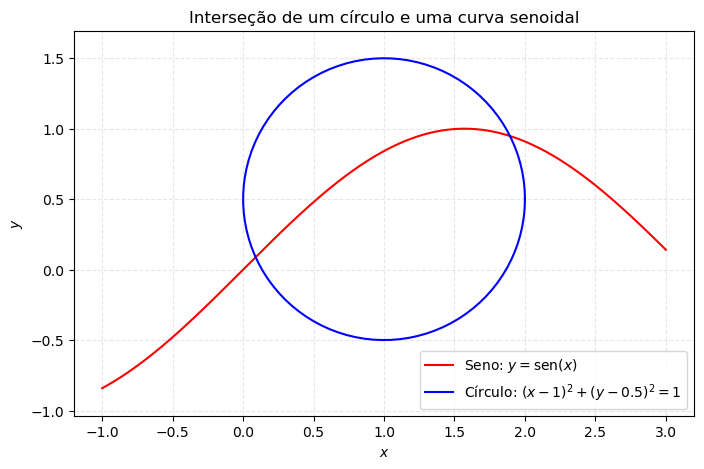

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plotar a curva senoidal:
xs = np.linspace(-1, 3, 1000)
ax.plot(xs, np.sin(xs), "r-", label="Seno: $ y = \\operatorname{sen}(x) $")
# Plotar o círculo:
theta = np.linspace(0, 2 * np.pi, 100)
circle_xs = 1 + np.cos(theta)
circle_ys = 0.5 + np.sin(theta)
ax.plot(circle_xs, circle_ys, "b-", label="Círculo: $ (x-1)^2 + (y-0.5)^2 = 1 $")

ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_title("Interseção de um círculo e uma curva senoidal")
ax.grid(linestyle="--", alpha=0.3)
ax.axis("equal")
ax.legend()
plt.show()

Tais sistemas de equações podem ser resolvidos com `scipy.optimize.root` fornecendo
uma estimativa inicial. Veja como podemos encontrar ambos os pontos de interseção:

In [ ]:
# Definir o sistema de equações:
def equations(vars):
   x, y = vars
   eq1 = (x - 1)**2 + (y - 0.5)**2 - 1  # Equação do círculo = 0
   eq2 = y - np.sin(x)                  # Equação da curva senoidal = 0
   return [eq1, eq2]

# Encontrar interseções usando diferentes estimativas iniciais:
initial_guesses = [
   [0, 0],   # Estimativa para interseção à esquerda
   [2, 1]    # Estimativa para interseção à direita
]

# Resolver para cada estimativa inicial:
for i, guess in enumerate(initial_guesses):
   solution = spo.root(equations, guess)
   
   print(f"\nSolução {i+1} (a partir da estimativa inicial {guess}):")
   print(f"x, y = {np.round(solution.x, 2)}")
   print("Valores da função na solução:")
   print(f"f(x,y) = {np.round(solution.fun, 2)}")

__Exercício:__ Encontre os pontos de interseção das curvas descritas pelas
seguintes duas equações não-lineares. Visualize as curvas e seus
pontos de interseção:
$$
\begin{cases}
\ \sin x + \cos y = 0.5 \\
\ x^2 + y^2 = 1
\end{cases}
$$

### $ 4.5 $ Problemas de otimização

O módulo `optimize` também fornece funções para resolver problemas de otimização.
Vamos examinar o problema de minimizar a função
$$
x^2 + y^2 + (x + y - 2)^2\,.
$$

In [ ]:
# Definir a função a minimizar:
f = lambda vars: vars[0]**2 + vars[1]**2 + (vars[0] + vars[1] - 2)**2

# Estimativa inicial:
x0 = [0, 0]

# Minimizar a função:
result = spo.minimize(f, x0, method="BFGS")

print("Mínimo encontrado em:")
print(result.x)
print("\nValor da função no mínimo:")
print(result.fun)
print("\nNúmero de iterações:")
print(result.nit)
print("\nMensagem de convergência:")
print(result.message)

__Exercício:__ Verifique manualmente que $ (2/3, 2/3) $ é o único ponto crítico de
$ f(x) $, e que este é de fato um mínimo global.

Vamos verificar esta resposta visualmente plotando as curvas de nível de $ f $ e
marcando o ponto mínimo encontrado pelo SciPy. (Focaremos em contornos e outros
tipos de gráficos em um notebook futuro; por enquanto, você pode ignorar o código abaixo e
concentrar-se no próprio gráfico.)

In [ ]:
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(xs, ys)
Z = X**2 + Y**2 + (X + Y - 2)**2

fig, ax = plt.subplots(figsize=(8, 5))
contour = ax.contour(X, Y, Z, 20, cmap="viridis")
fig.colorbar(contour, ax=ax)
ax.scatter(result.x[0], result.x[1], color="red", s=100, marker="x")
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(linestyle="--", alpha=0.3)
ax.set_title("Gráfico de Contorno de $ x^2 + y^2 + (x + y - 2)^2 $")
plt.show()

📝 Por padrão, `minimize` encontra um mínimo _local_, não necessariamente o mínimo
_global_, próximo à sua estimativa inicial. Para encontrar máximos usando SciPy, você pode chamar
`minimize` no negativo da sua função. 

__Exercício:__ Encontre um máximo (local) de 
$$
f(x, y) = x\sin(4x) + y\sin(2y)\,.
$$
Experimente com várias estimativas iniciais diferentes e verifique se os
resultados mudam.